<a href="https://colab.research.google.com/github/evanstaffen/Melanoma-Identification-with-CNNs/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trying binary classification

# Imports and functions



In [1]:
from sklearn.metrics import plot_confusion_matrix
from tensorflow.math import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow.keras.utils import img_to_array,load_img
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Recall as Recall
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from keras import models, layers, optimizers
from tensorflow.keras.wrappers import scikit_learn
from keras.callbacks import EarlyStopping
import os
import shutil
import pickle


# Processing Photos

In [ ]:
#Use this function as a sanity check
count = 0
dif_files = ['Training_Photos/NV','Testing_Photos/NV','Validation_Photos/NV','Training_Photos/MEL','Testing_Photos/MEL','Validation_Photos/MEL']
for dif in dif_files:
  for root_dir, cur_dir, files in os.walk(f'/content/drive/MyDrive/Melanoma_Mole/{dif}'):
    count += len(files)
    print(dif, 'file count:', count)
    count = 0

Training_Photos/NV file count: 6291
Testing_Photos/NV file count: 2480
Validation_Photos/NV file count: 1024
Training_Photos/MEL file count: 3259
Testing_Photos/MEL file count: 905
Validation_Photos/MEL file count: 358


In [ ]:
datagen = ImageDataGenerator(rescale= 1./255,
                             zca_whitening=True
                            )
                               
                               

training_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Training_Photos',
    target_size=(100, 100),
    batch_size=955,
    color_mode = 'rgb',
    class_mode='categorical'
    )
                               
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Validation_Photos',
    target_size=(100, 100),
    batch_size=138,
    color_mode = 'rgb',
    class_mode='categorical'
    )

testing_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Testing_Photos',
    target_size=(100, 100),
    batch_size=338,
    color_mode = 'rgb',
   class_mode='categorical'
   )

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1285: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 9550 images belonging to 2 classes.
Found 1382 images belonging to 2 classes.
Found 3385 images belonging to 2 classes.


In [ ]:
train_images, train_labels = next(training_generator)
val_images, val_labels = next(validation_generator)
test_images, test_labels = next(testing_generator)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1682: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
#Saving image arrays
with open(f'/content/drive/MyDrive/Melanoma_Mole/Arrays/train_images_arrays.npy', 'wb') as f:
  np.save(f, train_images)
with open(f'/content/drive/MyDrive/Melanoma_Mole/Arrays/val_images_arrays.npy', 'wb') as f:
  np.save(f, val_images)
with open(f'/content/drive/MyDrive/Melanoma_Mole/Arrays/test_images_arrays.npy', 'wb') as f:
  np.save(f, test_images)

#Saving label arrays
with open('/content/drive/MyDrive/Melanoma_Mole/Arrays/train_label_arrays.npy', 'wb') as f:
  np.save(f, train_labels)
with open('/content/drive/MyDrive/Melanoma_Mole/Arrays/val_label_arrays.npy', 'wb') as f:
  np.save(f, val_labels)
with open('/content/drive/MyDrive/Melanoma_Mole/Arrays/test_label_arrays.npy', 'wb') as f:
  np.save(f, test_labels)

In [ ]:
# Reshape label arrays for modelling
train_y = np.reshape(train_labels[:,0], (955,1))
test_y = np.reshape(test_labels[:,0], (338,1))
val_y = np.reshape(val_labels[:,0], (138,1))

# First Model

adding layers -- did not help

imbalance
  class weights
  remove images

learning rate -- did not help



In [ ]:
# Instantiate Sequential
first_model = models.Sequential()

# Input Layer
# Consider changes number of nodes, input_shape and activation
# 64 filters, 3*3 square each stride, max pooling into 2*2 matrix
first_model.add(layers.Conv2D(64, (3,3), input_shape = (100,100,3), activation = 'relu'))
first_model.add(layers.MaxPooling2D(2,2))

# Dense Layers
first_model.add(layers.Flatten())
first_model.add(layers.Dense(64,activation='relu'))

# Output Layer
first_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
# optimizer
first_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=[Recall(),'acc'])

# Early Stopping
early_stop = EarlyStopping(monitor='acc', min_delta=1e-8,
                           verbose=1, patience=10,
                           mode='max')
# Summary
first_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 153664)            0         
                                                                 
 dense_26 (Dense)            (None, 64)                9834560   
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,836,417
Trainable params: 9,836,417
Non-trainable params: 0
___________________________________________

In [ ]:
results_1 = first_model.fit(train_images, 
                    train_y,
                    epochs=200, verbose=1, 
                    validation_data=(val_images,val_y),
                    callbacks=early_stop)



In [ ]:
first_model.save('/content/drive/MyDrive/Melanoma_Mole/Models/first_model_tf',save_format='tf')

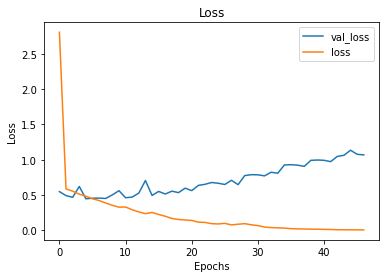

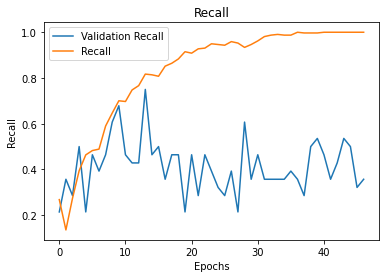

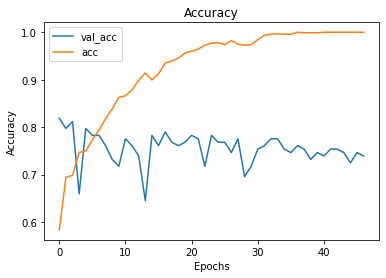

In [ ]:
history_1 = results_1.history 
plt.figure() 
plt.plot(history_1['val_loss']) 
plt.plot(history_1['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()
  
plt.figure()
plt.plot(history_1['val_recall_9'])
plt.plot(history_1['recall_9'])
plt.legend(['Validation Recall','Recall'])
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.figure()
plt.plot(history_1['val_acc'])
plt.plot(history_1['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
first_model.evaluate(test_images,test_y)

11/11 [==============================] - 2s 115ms/step - loss: 0.6584 - recall_12: 0.0825 - acc: 0.7160


[0.6583541631698608, 0.0824742242693901, 0.715976357460022]

# Second Model

Added another convolutional layer and dense layer

In [ ]:
# Instantiate Sequential
second_model = models.Sequential()

# Input Layer
# Consider changes number of nodes, input_shape and activation
# 64 filters, 3*3 square each stride, max pooling into 2*2 matrix
second_model.add(layers.Conv2D(128, (3,3), input_shape = (100,100,3), activation = 'relu'))
second_model.add(layers.MaxPooling2D(2,2))
second_model.add(layers.Dropout(0.3))

#Hidden Layer
second_model.add(layers.Conv2D(64, (3,3), input_shape = (100,100,3), activation = 'relu'))
second_model.add(layers.MaxPooling2D(2,2))
second_model.add(layers.Dropout(0.3))

# Dense Layers
second_model.add(layers.Flatten())
second_model.add(layers.Dense(64,activation='relu'))

second_model.add(layers.Dense(32,activation='relu'))

# Output Layer
second_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
# optimizer
second_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=[Recall(),'acc'])

# Summary
second_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 49, 49, 128)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 64)      

In [ ]:
results_2 = second_model.fit(train_images, 
                    train_y,
                    epochs=200, verbose=1, 
                    validation_data=(val_images,val_y),
                    callbacks=early_stop)

Epoch 1/200
30/30 [==============================] - 50s 2s/step - loss: 0.7129 - recall_11: 0.0000e+00 - acc: 0.6681 - val_loss: 0.5440 - val_recall_11: 0.0000e+00 - val_acc: 0.7971
Epoch 2/200
30/30 [==============================] - 46s 2s/step - loss: 0.6108 - recall_11: 0.0032 - acc: 0.6681 - val_loss: 0.5944 - val_recall_11: 0.2500 - val_acc: 0.7971
Epoch 3/200
30/30 [==============================] - 45s 2s/step - loss: 0.6193 - recall_11: 0.1073 - acc: 0.6743 - val_loss: 0.4991 - val_recall_11: 0.2500 - val_acc: 0.7971
Epoch 4/200
30/30 [==============================] - 47s 2s/step - loss: 0.6168 - recall_11: 0.2555 - acc: 0.6764 - val_loss: 0.5630 - val_recall_11: 0.2500 - val_acc: 0.8043
Epoch 5/200
30/30 [==============================] - 45s 2s/step - loss: 0.5999 - recall_11: 0.1199 - acc: 0.6723 - val_loss: 0.5435 - val_recall_11: 0.3929 - val_acc: 0.7826
Epoch 6/200
30/30 [==============================] - 48s 2s/step - loss: 0.5780 - recall_11: 0.2555 - acc: 0.6942 - v

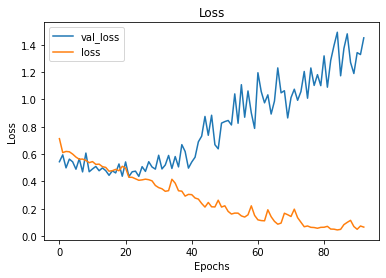

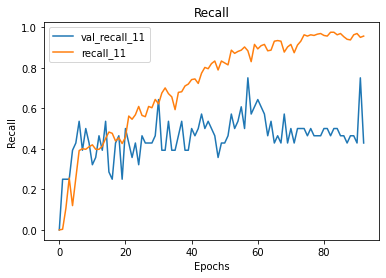

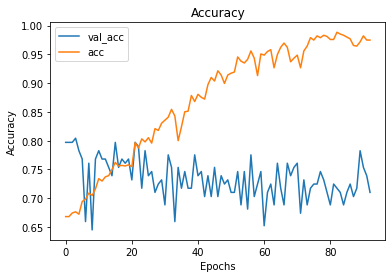

In [ ]:
history_2 = results_2.history 
plt.figure() 
plt.plot(history_2['val_loss']) 
plt.plot(history_2['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()
  
plt.figure()
plt.plot(history_2['val_recall_11'])
plt.plot(history_2['recall_11'])
plt.legend(['val_recall_11', 'recall_11'])
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.figure()
plt.plot(history_2['val_acc'])
plt.plot(history_2['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
second_model.evaluate(test_images,test_y)

11/11 [==============================] - 4s 319ms/step - loss: 1.4262 - recall_11: 0.5258 - acc: 0.7278


[1.4262028932571411, 0.5257731676101685, 0.7278106212615967]

In [ ]:
second_model.save('/content/drive/MyDrive/Melanoma_Mole/Models/second_model_tf',save_format='tf')

# Third Model

- lr = 0.0001

In [ ]:
# Instantiate Sequential
third_model = models.Sequential()

# Input Layer
# Consider changes number of nodes, input_shape and activation
# 64 filters, 3*3 square each stride, max pooling into 2*2 matrix
third_model.add(layers.Conv2D(128, (3,3), input_shape = (100,100,3), activation = 'relu'))
third_model.add(layers.MaxPooling2D(2,2))
third_model.add(layers.Dropout(0.3))

#Hidden Layer
third_model.add(layers.Conv2D(64, (3,3), input_shape = (100,100,3), activation = 'relu'))
third_model.add(layers.MaxPooling2D(2,2))
third_model.add(layers.Dropout(0.3))

# Dense Layers
third_model.add(layers.Flatten())
third_model.add(layers.Dense(64,activation='relu'))

third_model.add(layers.Dense(32,activation='relu'))

# Output Layer
third_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
# optimizer
third_model.compile(optimizer=Adam(lr=0.0001),
                    loss='binary_crossentropy',
                    metrics=[Recall(),'acc'])

# Summary
third_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 49, 49, 128)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 23, 23, 64)      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
results_3 = third_model.fit(train_images, 
                    train_y,
                    epochs=50, verbose=1, batch_size=32,
                    validation_data=(val_images,val_y),
                    callbacks=early_stop)

Epoch 1/50
30/30 [==============================] - 47s 2s/step - loss: 0.6302 - recall_13: 0.0662 - acc: 0.6555 - val_loss: 0.5989 - val_recall_13: 0.0000e+00 - val_acc: 0.7971
Epoch 2/50
30/30 [==============================] - 48s 2s/step - loss: 0.6119 - recall_13: 0.0315 - acc: 0.6660 - val_loss: 0.6082 - val_recall_13: 0.1786 - val_acc: 0.8043
Epoch 3/50
30/30 [==============================] - 46s 2s/step - loss: 0.5988 - recall_13: 0.0599 - acc: 0.6639 - val_loss: 0.5766 - val_recall_13: 0.0357 - val_acc: 0.7899
Epoch 4/50
30/30 [==============================] - 48s 2s/step - loss: 0.5964 - recall_13: 0.0694 - acc: 0.6660 - val_loss: 0.5651 - val_recall_13: 0.0357 - val_acc: 0.7826
Epoch 5/50
30/30 [==============================] - 46s 2s/step - loss: 0.5863 - recall_13: 0.0442 - acc: 0.6639 - val_loss: 0.5730 - val_recall_13: 0.2500 - val_acc: 0.8043
Epoch 6/50
30/30 [==============================] - 48s 2s/step - loss: 0.5974 - recall_13: 0.1577 - acc: 0.6681 - val_loss: 0

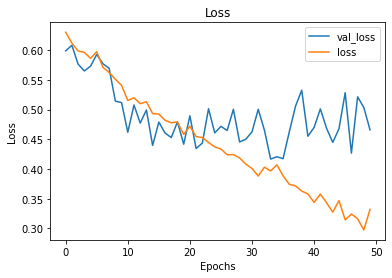

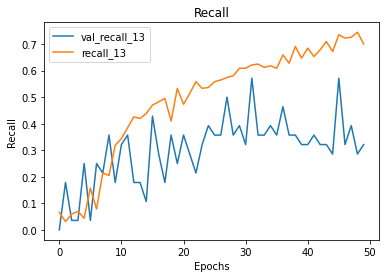

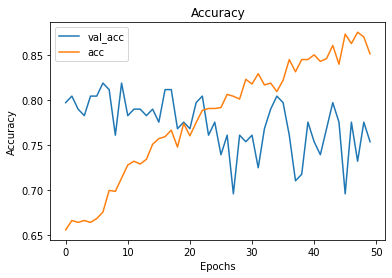

In [ ]:
history_3 = results_3.history 
plt.figure() 
plt.plot(history_3['val_loss']) 
plt.plot(history_3['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()
  
plt.figure()
plt.plot(history_3['val_recall_13'])
plt.plot(history_3['recall_13'])
plt.legend(['val_recall_13', 'recall_13'])
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.figure()
plt.plot(history_3['val_acc'])
plt.plot(history_3['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
third_model.evaluate(test_images,test_y)

11/11 [==============================] - 5s 434ms/step - loss: 0.5074 - recall_13: 0.4330 - acc: 0.7722


[0.5073809027671814, 0.4329896867275238, 0.7721893787384033]

In [ ]:
third_model.save('/content/drive/MyDrive/Melanoma_Mole/Models/third_model_tf',save_format='tf')

# Fourth Model

More layers

In [ ]:
# Instantiate Sequential
fourth_model = models.Sequential()

# Input Layer
# Consider changes number of nodes, input_shape and activation
# 64 filters, 3*3 square each stride, max pooling into 2*2 matrix
fourth_model.add(layers.Conv2D(64, (3,3), input_shape = (100,100,3), activation = 'relu'))
fourth_model.add(layers.MaxPooling2D(2,2))

# Dense Layers
fourth_model.add(layers.Flatten())
fourth_model.add(layers.Dense(32,activation='relu'))
fourth_model.add(layers.Dense(16,activation='relu'))

# Output Layer
fourth_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
# optimizer
fourth_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=[Recall(),'acc'])

# Early Stopping
early_stop = EarlyStopping(monitor='acc', min_delta=1e-8,
                           verbose=1, patience=10,
                           mode='max')
# Summary
fourth_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 153664)            0         
                                                                 
 dense_60 (Dense)            (None, 32)                4917280   
                                                                 
 dense_61 (Dense)            (None, 16)                528       
                                                                 
 dense_62 (Dense)            (None, 1)                 17        
                                                     

In [ ]:
results_4 = fourth_model.fit(train_images, 
                    train_y,
                    epochs=50, verbose=1, batch_size=32,
                    validation_data=(val_images,val_y),
                    callbacks=early_stop)

Epoch 1/50
30/30 [==============================] - 13s 388ms/step - loss: 1.0685 - recall_26: 0.2397 - acc: 0.6157 - val_loss: 0.5119 - val_recall_26: 0.2143 - val_acc: 0.8116
Epoch 2/50
30/30 [==============================] - 13s 439ms/step - loss: 0.6162 - recall_26: 0.1956 - acc: 0.6576 - val_loss: 0.4906 - val_recall_26: 0.2500 - val_acc: 0.8043
Epoch 3/50
30/30 [==============================] - 11s 367ms/step - loss: 0.5649 - recall_26: 0.2429 - acc: 0.6974 - val_loss: 0.4479 - val_recall_26: 0.1429 - val_acc: 0.8043
Epoch 4/50
30/30 [==============================] - 11s 369ms/step - loss: 0.5328 - recall_26: 0.2618 - acc: 0.7173 - val_loss: 0.4613 - val_recall_26: 0.2500 - val_acc: 0.7826
Epoch 5/50
30/30 [==============================] - 11s 375ms/step - loss: 0.5173 - recall_26: 0.4322 - acc: 0.7529 - val_loss: 0.4549 - val_recall_26: 0.2857 - val_acc: 0.8188
Epoch 6/50
30/30 [==============================] - 11s 376ms/step - loss: 0.5038 - recall_26: 0.4227 - acc: 0.7497

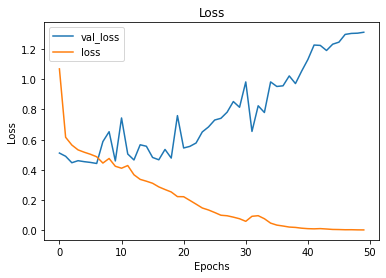

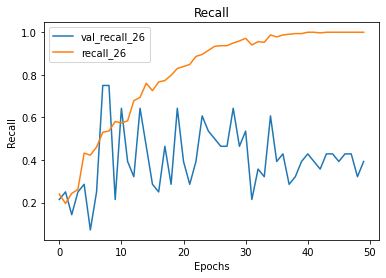

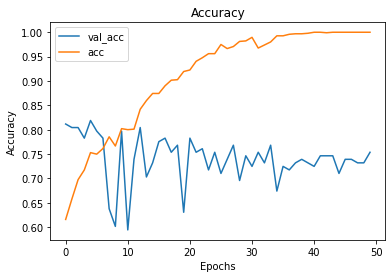

In [ ]:
history_4 = results_4.history 
plt.figure() 
plt.plot(history_4['val_loss']) 
plt.plot(history_4['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()
  
plt.figure()
plt.plot(history_4['val_recall_26'])
plt.plot(history_4['recall_26'])
plt.legend(['val_recall_26', 'recall_26'])
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.figure()
plt.plot(history_4['val_acc'])
plt.plot(history_4['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
fourth_model.save('/content/drive/MyDrive/Melanoma_Mole/Models/fourth_model_tf',save_format='tf')

In [ ]:
fourth_model.evaluate(test_images,test_y)

11/11 [==============================] - 1s 95ms/step - loss: 1.0736 - recall_26: 0.3918 - acc: 0.7367


[1.073632001876831, 0.39175257086753845, 0.7366864085197449]

# Fifth Model

In [ ]:
# Instantiate Sequential
fifth_model = models.Sequential()

# Input Layer
# Consider changes number of nodes, input_shape and activation
# 64 filters, 3*3 square each stride, max pooling into 2*2 matrix
fifth_model.add(layers.Conv2D(128, (3,3), input_shape = (100,100,3), activation = 'relu'))
fifth_model.add(layers.MaxPooling2D(2,2))
fifth_model.add(layers.Dropout(0.3))

#Hidden Layer
#fifth_model.add(layers.Conv2D(64, (3,3), input_shape = (100,100,3), activation = 'relu'))
#fifth_model.add(layers.MaxPooling2D(2,2))
#fifth_model.add(layers.Dropout(0.3))

#Hidden Layer
#fifth_model.add(layers.Conv2D(32, (3,3), input_shape = (100,100,3), activation = 'relu'))
#fifth_model.add(layers.MaxPooling2D(2,2))
#fifth_model.add(layers.Dropout(0.3))

# Dense Layers
fifth_model.add(layers.Flatten())
fifth_model.add(layers.Dense(64,activation='relu'))

#fifth_model.add(layers.Dense(32,activation='relu'))

# Output Layer
fifth_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
# optimizer
fifth_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=[Recall(),'acc'])
# Early Stopping
early_stop = EarlyStopping(monitor='acc', min_delta=1e-8,
                           verbose=1, patience=10,
                           mode='max')
# Summary
fifth_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 49, 49, 128)      0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 49, 49, 128)       0         
                                                                 
 flatten_34 (Flatten)        (None, 307328)            0         
                                                                 
 dense_79 (Dense)            (None, 64)                19669056  
                                                                 
 dense_80 (Dense)            (None, 1)                 65        
                                                     

In [ ]:
results_5 = fifth_model.fit(train_images, 
                    train_y,
                    epochs=200, verbose=1, 
                    validation_data=(val_images,val_y),
                    callbacks=early_stop)


Epoch 1/200
30/30 [==============================] - 26s 819ms/step - loss: 2.1214 - recall_34: 0.3880 - acc: 0.5539 - val_loss: 0.4804 - val_recall_34: 0.0000e+00 - val_acc: 0.7971
Epoch 2/200
30/30 [==============================] - 24s 800ms/step - loss: 0.5941 - recall_34: 0.0946 - acc: 0.6796 - val_loss: 0.5901 - val_recall_34: 0.4286 - val_acc: 0.7391
Epoch 3/200
30/30 [==============================] - 24s 790ms/step - loss: 0.5740 - recall_34: 0.2997 - acc: 0.7058 - val_loss: 0.4555 - val_recall_34: 0.2500 - val_acc: 0.8188
Epoch 4/200
30/30 [==============================] - 24s 806ms/step - loss: 0.5451 - recall_34: 0.2965 - acc: 0.7120 - val_loss: 0.4788 - val_recall_34: 0.4286 - val_acc: 0.7681
Epoch 5/200
30/30 [==============================] - 28s 944ms/step - loss: 0.5226 - recall_34: 0.3975 - acc: 0.7288 - val_loss: 0.4685 - val_recall_34: 0.0714 - val_acc: 0.8116
Epoch 6/200
30/30 [==============================] - 24s 807ms/step - loss: 0.5161 - recall_34: 0.3375 - a

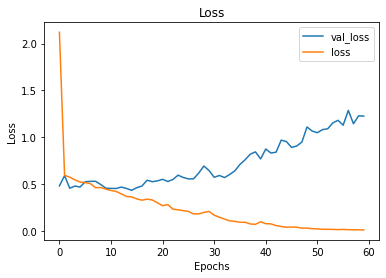

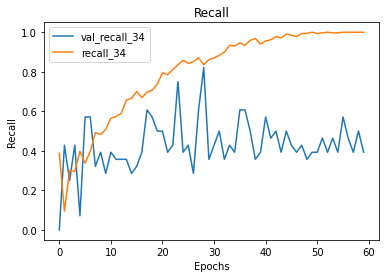

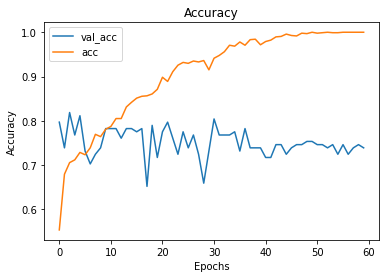

In [ ]:
history_5 = results_5.history 
plt.figure() 
plt.plot(history_5['val_loss']) 
plt.plot(history_5['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()
  
plt.figure()
plt.plot(history_5['val_recall_34'])
plt.plot(history_5['recall_34'])
plt.legend(['val_recall_34', 'recall_34'])
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.figure()
plt.plot(history_5['val_acc'])
plt.plot(history_5['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
fifth_model.evaluate(test_images,test_y)

11/11 [==============================] - 2s 172ms/step - loss: 1.1065 - recall_34: 0.4330 - acc: 0.7456


[1.106487512588501, 0.4329896867275238, 0.7455621361732483]

In [ ]:
fifth_model.save('/content/drive/MyDrive/Melanoma_Mole/Models/fourth_model_tf',save_format='tf')

# Sixth Model

# More image Augmentation
# Same architecture as second model

In [ ]:
datagen_2 = ImageDataGenerator(rescale=1/255,
  samplewise_center=True, 
  featurewise_std_normalization=False,
  samplewise_std_normalization=True,
  zca_whitening=False,
  )

In [ ]:
training_generator_2 = datagen_2.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Training_Photos',
    target_size=(100, 100),
    batch_size=955,
    color_mode = 'rgb',
    class_mode='binary'
    )
                               
validation_generator_2 = datagen_2.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Validation_Photos',
    target_size=(100, 100),
    batch_size=138,
    color_mode = 'rgb',
    class_mode='binary'
    )

testing_generator_2 = datagen_2.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Testing_Photos',
    target_size=(100, 100),
    batch_size=338,
    color_mode = 'rgb',
   class_mode='binary'
   )


Found 9550 images belonging to 2 classes.
Found 1382 images belonging to 2 classes.
Found 3385 images belonging to 2 classes.


In [ ]:
train_images_2, train_labels_2 = next(training_generator_2)
val_images_2, val_labels_2 = next(validation_generator_2)
test_images_2, test_labels_2 = next(testing_generator_2)

In [ ]:
# Instantiate Sequential
sixth_model = models.Sequential()

# Input Layer
# Consider changes number of nodes, input_shape and activation
# 64 filters, 3*3 square each stride, max pooling into 2*2 matrix
sixth_model.add(layers.Conv2D(128, (3,3), input_shape = (100,100,3), activation = 'relu'))
sixth_model.add(layers.MaxPooling2D(2,2))
sixth_model.add(layers.Dropout(0.3))

#Hidden Layer
sixth_model.add(layers.Conv2D(64, (3,3), input_shape = (100,100,3), activation = 'relu'))
sixth_model.add(layers.MaxPooling2D(2,2))
sixth_model.add(layers.Dropout(0.3))

# Dense Layers
sixth_model.add(layers.Flatten())
sixth_model.add(layers.Dense(64,activation='relu'))

sixth_model.add(layers.Dense(32,activation='relu'))

# Output Layer
sixth_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
# optimizer
sixth_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=[Recall(),'acc'])

# Early Stopping
early_stop = EarlyStopping(monitor='acc', min_delta=1e-8,
                           verbose=1, patience=10,
                           mode='max')
# Summary
sixth_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 49, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 64)       

In [ ]:
results_6 = sixth_model.fit(train_images_2, 
                    train_labels_2,
                    epochs=200, verbose=1, 
                    validation_data=(val_images_2,val_labels_2),
                    callbacks=early_stop)

Epoch 1/200
30/30 [==============================] - 50s 2s/step - loss: 0.6722 - recall_1: 0.8840 - acc: 0.6953 - val_loss: 0.5390 - val_recall_1: 0.8056 - val_acc: 0.7609
Epoch 2/200
30/30 [==============================] - 49s 2s/step - loss: 0.5580 - recall_1: 0.8480 - acc: 0.7089 - val_loss: 0.4924 - val_recall_1: 0.8889 - val_acc: 0.8043
Epoch 3/200
30/30 [==============================] - 45s 1s/step - loss: 0.5285 - recall_1: 0.8871 - acc: 0.7403 - val_loss: 0.4601 - val_recall_1: 0.9352 - val_acc: 0.8261
Epoch 4/200
30/30 [==============================] - 45s 1s/step - loss: 0.5067 - recall_1: 0.8840 - acc: 0.7414 - val_loss: 0.4316 - val_recall_1: 0.8704 - val_acc: 0.7971
Epoch 5/200
30/30 [==============================] - 47s 2s/step - loss: 0.4880 - recall_1: 0.8856 - acc: 0.7571 - val_loss: 0.5160 - val_recall_1: 0.7037 - val_acc: 0.6957
Epoch 6/200
30/30 [==============================] - 47s 2s/step - loss: 0.4734 - recall_1: 0.8683 - acc: 0.7749 - val_loss: 0.5132 - v

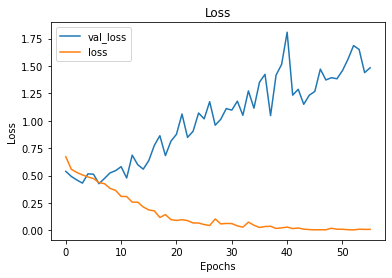

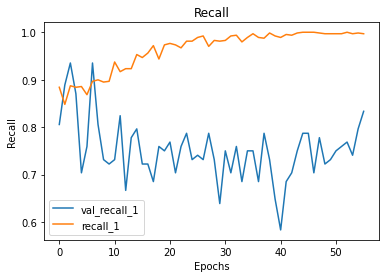

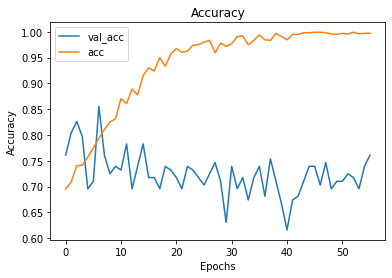

In [ ]:
history_6 = results_6.history 
plt.figure() 
plt.plot(history_6['val_loss']) 
plt.plot(history_6['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()
  
plt.figure()
plt.plot(history_6['val_recall_1'])
plt.plot(history_6['recall_1'])
plt.legend(['val_recall_1', 'recall_1'])
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.figure()
plt.plot(history_6['val_acc'])
plt.plot(history_6['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [19]:
sixth = models.load_model('/content/drive/MyDrive/Melanoma_Mole/Models/sixth_model_tf')
sixth.evaluate(test_images,test_labels)

106/106 [==============================] - 1s 5ms/step - loss: 1.8421 - recall_1: 0.8399 - acc: 0.7353


[1.8421499729156494, 0.8399193286895752, 0.7353028059005737]

In [ ]:
#sixth_model.save('/content/drive/MyDrive/Melanoma_Mole/Models/sixth_model_tf',save_format='tf')

# Seventh Model

In [ ]:
datagen = ImageDataGenerator(rescale=1/255,
  samplewise_center=True, 
  featurewise_std_normalization=False,
  samplewise_std_normalization=True,
  rotation_range=10,  
  zoom_range = 0.1,
  zca_whitening=False,
  )

In [ ]:
training_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Training_Photos',
    target_size=(100, 100),
    batch_size=9550,
    color_mode = 'rgb',
    class_mode='binary'
    )
                               
validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Validation_Photos',
    target_size=(100, 100),
    batch_size=1382,
    color_mode = 'rgb',
    class_mode='binary'
    )

testing_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Melanoma_Mole/Testing_Photos',
    target_size=(100, 100),
    batch_size=3385,
    color_mode = 'rgb',
   class_mode='binary'
   )


Found 9550 images belonging to 2 classes.
Found 1382 images belonging to 2 classes.
Found 3385 images belonging to 2 classes.


In [ ]:
train_images, train_labels = next(training_generator)
val_images, val_labels = next(validation_generator)
test_images, test_labels = next(testing_generator)

In [ ]:
#Saving image arrays
with open(f'/content/drive/MyDrive/Melanoma_Mole/Arrays/train_images_arrays_3.npy', 'wb') as f:
  np.save(f, train_images)
with open(f'/content/drive/MyDrive/Melanoma_Mole/Arrays/val_images_arrays_3.npy', 'wb') as f:
  np.save(f, val_images)
with open(f'/content/drive/MyDrive/Melanoma_Mole/Arrays/test_images_arrays_3.npy', 'wb') as f:
  np.save(f, test_images)

#Saving label arrays
with open('/content/drive/MyDrive/Melanoma_Mole/Arrays/train_label_arrays_3.npy', 'wb') as f:
  np.save(f, train_labels)
with open('/content/drive/MyDrive/Melanoma_Mole/Arrays/val_label_arrays_3.npy', 'wb') as f:
  np.save(f, val_labels)
with open('/content/drive/MyDrive/Melanoma_Mole/Arrays/test_label_arrays_3.npy', 'wb') as f:
  np.save(f, test_labels)

In [8]:
train_images = np.load('/content/drive/MyDrive/Melanoma_Mole/Arrays/train_images_arrays_3.npy')
val_images = np.load('/content/drive/MyDrive/Melanoma_Mole/Arrays/val_images_arrays_3.npy')
test_images = np.load('/content/drive/MyDrive/Melanoma_Mole/Arrays/test_images_arrays_3.npy')

train_labels = np.load('/content/drive/MyDrive/Melanoma_Mole/Arrays/train_label_arrays_3.npy')
val_labels = np.load('/content/drive/MyDrive/Melanoma_Mole/Arrays/val_label_arrays_3.npy')
test_labels = np.load('/content/drive/MyDrive/Melanoma_Mole/Arrays/test_label_arrays_3.npy')

In [9]:
# Instantiate Sequential
seventh_model = models.Sequential()

# Input Layer
# Consider changes number of nodes, input_shape and activation
# 64 filters, 3*3 square each stride, max pooling into 2*2 matrix
seventh_model.add(layers.Conv2D(64, (3,3), input_shape = (100,100,3), activation = 'relu'))
seventh_model.add(layers.MaxPooling2D(2,2))
seventh_model.add(layers.Dropout(0.3))

#Hidden Layer
seventh_model.add(layers.Conv2D(32, (3,3), input_shape = (100,100,3), activation = 'relu'))
seventh_model.add(layers.MaxPooling2D(2,2))
seventh_model.add(layers.Dropout(0.3))

# Dense Layers
seventh_model.add(layers.Flatten())
seventh_model.add(layers.Dense(64,activation='relu'))

seventh_model.add(layers.Dense(32,activation='relu'))

# Output Layer
seventh_model.add(layers.Dense(1, activation='sigmoid'))

# Compile
# optimizer
seventh_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=[Recall(),'acc'])

# Early Stopping
early_stop = EarlyStopping(monitor='acc', min_delta=1e-2,
                           verbose=1, patience=5,
                           mode='max')
# Summary
seventh_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 49, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 23, 23, 32)       

In [10]:
results_7 = seventh_model.fit(train_images, 
                    train_labels,
                    epochs=300, verbose=1, batch_size=16,
                    validation_data=(val_images,val_labels),
                    callbacks=early_stop)

Epoch 1/300
597/597 [==============================] - 4s 6ms/step - loss: 0.5534 - recall_1: 0.8520 - acc: 0.7092 - val_loss: 0.4913 - val_recall_1: 0.8984 - val_acc: 0.7670
Epoch 2/300
597/597 [==============================] - 3s 5ms/step - loss: 0.5126 - recall_1: 0.8585 - acc: 0.7366 - val_loss: 0.4822 - val_recall_1: 0.7588 - val_acc: 0.7366
Epoch 3/300
597/597 [==============================] - 3s 5ms/step - loss: 0.4817 - recall_1: 0.8550 - acc: 0.7597 - val_loss: 0.4672 - val_recall_1: 0.8330 - val_acc: 0.7815
Epoch 4/300
597/597 [==============================] - 3s 5ms/step - loss: 0.4627 - recall_1: 0.8746 - acc: 0.7732 - val_loss: 0.4659 - val_recall_1: 0.8027 - val_acc: 0.7800
Epoch 5/300
597/597 [==============================] - 3s 5ms/step - loss: 0.4437 - recall_1: 0.8776 - acc: 0.7818 - val_loss: 0.4319 - val_recall_1: 0.8955 - val_acc: 0.8003
Epoch 6/300
597/597 [==============================] - 3s 5ms/step - loss: 0.4163 - recall_1: 0.8848 - acc: 0.8009 - val_loss

In [11]:
seventh_model.save('/content/drive/MyDrive/Melanoma_Mole/Models/seventh_model_tf',save_format='tf')

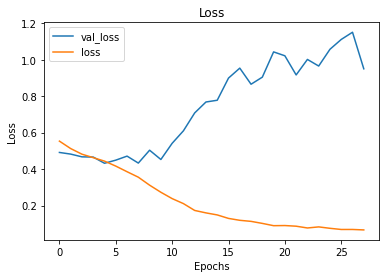

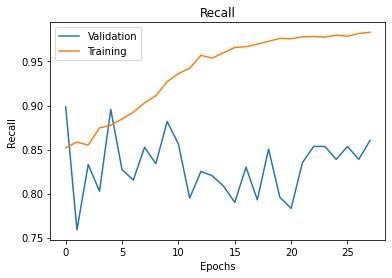

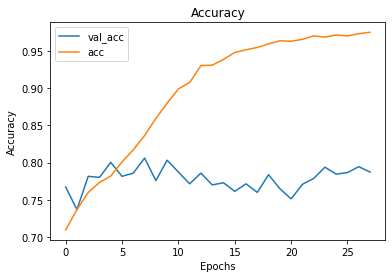

In [13]:
history_7 = results_7.history 
plt.figure() 
plt.plot(history_7['val_loss']) 
plt.plot(history_7['loss']) 
plt.legend(['val_loss', 'loss']) 
plt.title('Loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()
  
plt.figure()
plt.plot(history_7['val_recall_1'])
plt.plot(history_7['recall_1'])
plt.legend(['Validation','Training'])
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.show()

plt.figure()
plt.plot(history_7['val_acc'])
plt.plot(history_7['acc'])
plt.legend(['val_acc', 'acc'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [36]:
loss, recall, acc = seventh_model.evaluate(test_images,test_labels)

106/106 [==============================] - 0s 4ms/step - loss: 1.0077 - recall_1: 0.8677 - acc: 0.7811


In [37]:
recall , acc

(0.8677419424057007, 0.7810930609703064)